In [1]:
%matplotlib inline


SVM: Margen Maximo que separa un HiperPlano
=========================================

El objetivo es trazar los vectores con el margen maximo que divida el hiperplano utiliando un conjunto de datos separables de dos clases mediante un clasificador de maquina de vectores de soporte con un kernel lineal 

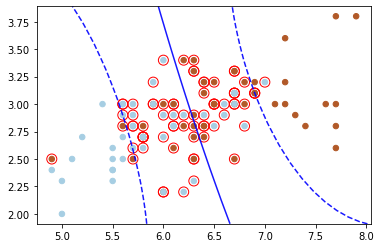

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


import matplotlib.pyplot as plt
from sklearn import datasets, svm

# Creamos 100 puntos distribuidos en el plano
#X, y = make_blobs(n_samples=400, centers=2, random_state=6)
                                            #que hace el random_state al generar los datos, que provoca cambiar el valor?

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)   


# fit the model                         kernel= rbf o linear
clf = svm.SVC(kernel='rbf', C=1)    #Una C baja suaviza la superficie de decisión, mientras que una C alta apunta a 
                                           #clasificar correctamente todos los ejemplos de entrenamiento. ES CORRECTO????

    
clf.fit(X, y)               #que le hace  el fit al conjunto de datos (X,Y)?????? es el encargado de entrenar alalgoritmo?????
                            #o esta ya mandando datos para ser evaluados, de ser asi, en donde se entrena al algoritmo????

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) #s=tamaño de los puntos en el hiperplano

# Grafica la funcion de decision
ax = plt.gca()                    #no entiendo que es lo que hace el plt.gca()????????
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear cuadricula para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# trazar límites y márgenes de decisión
ax.contour(XX, YY, Z, colors='b', levels=[-1, 0, 1], alpha=0.9,
           linestyles=['--', '-', '--'])
# trazar contorno de los puntos que funcionan como vectores de soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='r')
plt.show()

In [3]:
print(clf.score(X,y))
#no puedo hacer variar el score, con todo me sale 1, sera que no debo analizar X,y sino otros datos.???????

0.73
